In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("data/titanic.csv")
titanic["age"] = titanic["age"].replace(["?"], [None]).astype("float")
titanic["fare"] = titanic["fare"].replace(["?"], [None]).astype("float")
titanic["pclass"] = titanic["pclass"].replace(["?"], [None]).astype("float")

In [3]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
s1 = titanic.groupby("sex")["age"].mean()
s1

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

In [5]:
df = titanic.groupby(['pclass', 'sex']).mean(numeric_only=True)

In [6]:
df.index

MultiIndex([(1.0, 'female'),
            (1.0,   'male'),
            (2.0, 'female'),
            (2.0,   'male'),
            (3.0, 'female'),
            (3.0,   'male')],
           names=['pclass', 'sex'])

In [7]:
df

survived        age     sibsp     parch        fare
pclass sex                                                        
1.0    female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2.0    female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3.0    female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

In [8]:
pops = pd.read_csv("data/state_pops.csv")

In [9]:
pops

,state,year,population
0,AL,2012,4817528.0
1,AL,2010,4785570.0
2,AL,2011,4801627.0
3,AL,2009,4757938.0
4,AL,2013,4833722.0
...,...,...,...
1267,USA,2013,316128839.0
1268,USA,2009,306771529.0
1269,USA,2010,309326295.0
1270,USA,2011,311582564.0


In [10]:
pops.set_index(["state", "year"], inplace=True)
pops

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [11]:
pops.index

MultiIndex([( 'AL', 2012),
            ( 'AL', 2010),
            ( 'AL', 2011),
            ( 'AL', 2009),
            ( 'AL', 2013),
            ( 'AL', 2007),
            ( 'AL', 2008),
            ( 'AL', 2005),
            ( 'AL', 2006),
            ( 'AL', 2004),
            ...
            ('USA', 2004),
            ('USA', 2005),
            ('USA', 2006),
            ('USA', 2007),
            ('USA', 2008),
            ('USA', 2013),
            ('USA', 2009),
            ('USA', 2010),
            ('USA', 2011),
            ('USA', 2012)],
           names=['state', 'year'], length=1272)

In [12]:
pops.sort_index()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [13]:
pops.sort_index(level = 1)

,,population
state,year,
AK,1990,553290.0
AL,1990,4050055.0
AR,1990,2356586.0
AZ,1990,3684097.0
CA,1990,29959515.0
...,...,...
VT,2013,626630.0
WA,2013,6971406.0
WI,2013,5742713.0


In [14]:
pops.sort_index(level = 0)

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [15]:
pops.sort_index(level = [0,1], ascending=[True, False])

population
state year            
AK    2013    735132.0
      2012    730307.0
      2011    723375.0
      2010    713868.0
      2009    698895.0
...                ...
WY    1994    480283.0
      1993    473081.0
      1992    466251.0
      1991    459260.0
      1990    453690.0

[1272 rows x 1 columns]

In [16]:
pops.loc["AK"].head()

,population
year,
1990,553290.0
1992,588736.0
1994,603308.0
1991,570193.0
1993,599434.0


In [17]:
pops.loc[["AK", "WY"]]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1994    603308.0
      1991    570193.0
      1993    599434.0
      1995    604412.0
      1996    608569.0
      1998    619933.0
      1997    612968.0
      1999    624779.0
      2000    627963.0
      2001    633714.0
      2002    642337.0
      2003    648414.0
      2004    659286.0
      2005    666946.0
      2006    675302.0
      2007    680300.0
      2008    687455.0
      2013    735132.0
      2009    698895.0
      2010    713868.0
      2011    723375.0
      2012    730307.0
WY    2012    576626.0
      2011    567329.0
      2010    564222.0
      2009    559851.0
      2013    582658.0
      2007    534876.0
      2008    546043.0
      2006    522667.0
      2005    514157.0
      2003    503453.0
      2004    509106.0
      2002    500017.0
      2001    494657.0
      2000    494300.0
      1999    491780.0
      1997    489452.0
      1998    490787.0
      1996    488167.0
      1995    485160.0
      1994    480283.0
      1992    466251.0
      1993    473081.0
      1991    459260.0
      1990    453690.0

In [18]:
pops.loc[("AK", 1990)]

population    553290.0
Name: (AK, 1990), dtype: float64

In [19]:
pops.loc[:, 2013, :].head()

,population
state,
AL,4833722.0
AK,735132.0
AZ,6626624.0
AR,2959373.0
CA,38332521.0


In [20]:
pops.xs(2013, level = 1).head()

,population
state,
AL,4833722.0
AK,735132.0
AZ,6626624.0
AR,2959373.0
CA,38332521.0


In [21]:
pops.index.levels

FrozenList([['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'USA', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]])

In [22]:
pops.index.get_level_values(0)

Index(['AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL', 'AL',
       ...
       'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA'],
      dtype='object', name='state', length=1272)

In [23]:
pops.index.get_level_values(1)

Index([2012, 2010, 2011, 2009, 2013, 2007, 2008, 2005, 2006, 2004,
       ...
       2004, 2005, 2006, 2007, 2008, 2013, 2009, 2010, 2011, 2012],
      dtype='int64', name='year', length=1272)

In [24]:
df = titanic.groupby("sex").agg({"age" : ["min","max"], "fare" : ["min", "max"]})

In [25]:
df

age        fare          
           min   max   min       max
sex                                 
female  0.1667  76.0  6.75  512.3292
male    0.3333  80.0  0.00  512.3292

In [26]:
df["age"]

,min,max
sex,,
female,0.1667,76.0
male,0.3333,80.0


In [27]:
pops

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [28]:
unstack_df = pops.unstack()

In [29]:
unstack_df

population                                                      \
year          1990         1991         1992         1993         1994   
state                                                                    
AK        553290.0     570193.0     588736.0     599434.0     603308.0   
AL       4050055.0    4099156.0    4154014.0    4214202.0    4260229.0   
AR       2356586.0    2383144.0    2415984.0    2456303.0    2494019.0   
AZ       3684097.0    3788576.0    3915740.0    4065440.0    4245089.0   
CA      29959515.0   30470736.0   30974659.0   31274928.0   31484435.0   
CO       3307618.0    3387119.0    3495939.0    3613734.0    3724168.0   
CT       3291967.0    3302895.0    3300712.0    3309175.0    3316121.0   
DC        605321.0     600870.0     597567.0     595302.0     589240.0   
DE        669567.0     683080.0     694927.0     706378.0     717545.0   
FL      13033307.0   13369798.0   13650553.0   13927185.0   14239444.0   
GA       6512602.0    6653005.0    6817203.0    6978240.0    7157165.0   
HI       1113491.0    1136754.0    1158613.0    1172838.0    1187536.0   
IA       2781018.0    2797613.0    2818401.0    2836972.0    2850746.0   
ID       1012384.0    1041316.0    1071685.0    1108768.0    1145140.0   
IL      11453316.0   11568964.0   11694184.0   11809579.0   11912585.0   
IN       5557798.0    5616388.0    5674547.0    5739019.0    5793526.0   
KS       2481349.0    2498722.0    2532395.0    2556547.0    2580513.0   
KY       3694048.0    3722328.0    3765469.0    3812206.0    3849088.0   
LA       4221532.0    4253279.0    4293003.0    4316428.0    4347481.0   
MA       6022639.0    6018470.0    6028709.0    6060569.0    6095241.0   
MD       4799770.0    4867641.0    4923369.0    4971889.0    5023060.0   
ME       1231719.0    1237081.0    1238508.0    1242302.0    1242662.0   
MI       9311319.0    9400446.0    9479065.0    9540114.0    9597737.0   
MN       4389857.0    4440859.0    4495572.0    4555956.0    4610355.0   
MO       5128880.0    5170800.0    5217101.0    5271175.0    5324497.0   
MS       2578897.0    2598733.0    2623734.0    2655100.0    2688992.0   
MT        800204.0     809680.0     825770.0     844761.0     861306.0   
NC       6664016.0    6784280.0    6897214.0    7042818.0    7187398.0   
ND        637685.0     635753.0     638223.0     641216.0     644806.0   
NE       1581660.0    1595919.0    1611687.0    1625590.0    1639041.0   
NH       1112384.0    1109929.0    1117785.0    1129458.0    1142561.0   
NJ       7762963.0    7814676.0    7880508.0    7948915.0    8014306.0   
NM       1521574.0    1555305.0    1595442.0    1636453.0    1682398.0   
NV       1220695.0    1296172.0    1351367.0    1411215.0    1499298.0   
NY      18020784.0   18122510.0   18246653.0   18374954.0   18459470.0   
OH      10864162.0   10945762.0   11029431.0   11101140.0   11152455.0   
OK       3148825.0    3175440.0    3220517.0    3252285.0    3280940.0   
OR       2860375.0    2928507.0    2991755.0    3060367.0    3121264.0   
PA      11903299.0   11982164.0   12049450.0   12119724.0   12166050.0   
PR             NaN          NaN          NaN          NaN          NaN   
RI       1005995.0    1010649.0    1012581.0    1015113.0    1015960.0   
SC       3501155.0    3570404.0    3620464.0    3663314.0    3705397.0   
SD        697101.0     703669.0     712801.0     722160.0     730790.0   
TN       4894492.0    4966587.0    5049742.0    5137584.0    5231438.0   
TX      17056755.0   17398005.0   17759738.0   18161612.0   18564062.0   
USA    249622814.0  252980942.0  256514231.0  259918595.0  263125826.0   
UT       1731223.0    1779780.0    1836799.0    1898404.0    1960446.0   
VA       6216884.0    6301217.0    6414307.0    6509630.0    6593139.0   
VT        564798.0     568606.0     572751.0     577748.0     583836.0   
WA       4903043.0    5025624.0    5160757.0    5278842.0    5375161.0   
WI       4904562.0    4964343.0    5025398.0    5084889.0    5133678.0   
WV       179

In [30]:
unstack_df.stack()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1262 rows x 1 columns]

<Axes: xlabel='pclass,sex'>

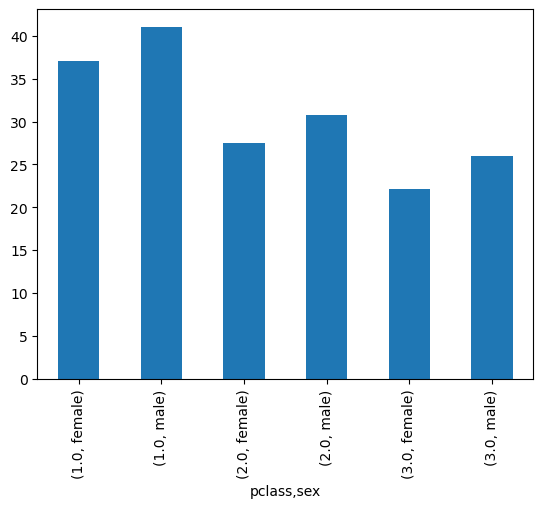

In [31]:
titanic.groupby(["pclass","sex"])["age"].mean().plot(kind = "bar")

In [32]:
titanic.groupby(["pclass","sex"])["age"].mean().unstack()

sex,female,male
pclass,,
1.0,37.037594,41.029250
2.0,27.499191,30.815401
3.0,22.185307,25.962273


<Axes: xlabel='pclass'>

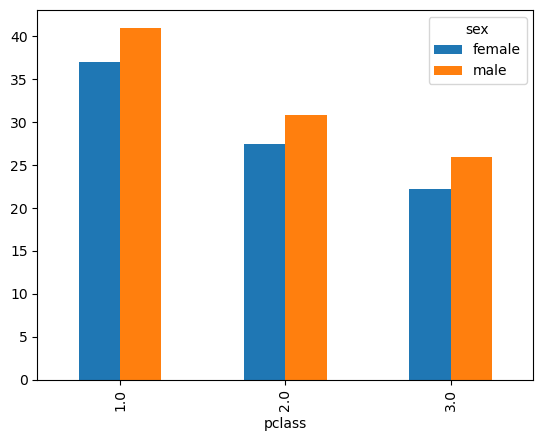

In [33]:
titanic.groupby(["pclass","sex"])["age"].mean().unstack().plot(kind = "bar")